In [ ]:
def mergeType(final):
    tps = []
    for i in range(len(final)-1):
        if final[i+1][1] != '' and final[i][1] == '':
            tps.append(i-len(tps))
    return tps

In [ ]:
mergeType([(['the', 'demise', 'of', '<Entity>'], ''), (['What', 'disease', 'led', 'to'], 'Disease')])

In [ ]:
final = [(['the', 'demise', 'of', '<Entity>'], ''), (['What', 'disease', 'led', 'to'], 'Disease')]

In [ ]:
mergeType(final)

In [ ]:
del final[0]

In [ ]:
final

In [ ]:
from stanfordcorenlp import StanfordCoreNLP
from nltk.tree import ParentedTree
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from hierarchy import Hierarchy
import ast
import string

nlp = StanfordCoreNLP('http://localhost', port=9000)
lemmatizer = WordNetLemmatizer()
specificStopWords = {'Give', 'Show', 'List', 'Name', 'Tell', 'many', 'much', 'all', 'whose', 'often', 'also', 'Count', 'Find', 'amongst', 'Amongst', 'among', 'Among', 'would'}
whwords = {'How', 'Which', 'Who', 'Whose', 'Whom', 'When', 'Where', 'What', 'Give', 'Show', 'List', 'Name', 'Tell', 'Count', 'Find', 'what'}
newstopwords = [line.strip() for line in open('stopwords').readlines()]
yesnowords = {'is', 'are', 'were', 'was', 'do', 'does', 'did', 'has', 'have', 'had'}
types = [(t.strip().upper(),t.strip()) for t in open('hierarchy.txt').readlines()]
misstypes = [tuple(t.strip().split(',')) for t in open('./misstypes').readlines()]
typedict = dict(types+misstypes)
misstypedict = dict(misstypes)
del typedict['TYPE']
table = dict.fromkeys(string.punctuation)
del table['<']
del table['>']
table = str.maketrans(table)

In [ ]:
def findQType(line):
    line = line[0].upper() + line[1:]
    lineSplitOrig = line.split()
    if lineSplitOrig[1] == 'which':
        lineSplitOrig[1] = 'Which'
    elif lineSplitOrig[1] == 'what':
        lineSplitOrig[1] = 'What'
    line = ' '.join(lineSplitOrig)
    ptree = ParentedTree.fromstring(nlp.parse(line))
    firstw = lineSplitOrig[0].lower()
    if firstw == 'who' or firstw == 'whom' or firstw == 'whose':
        qt = 'Person'
    elif firstw == 'when':
        qt = 'Time'
    elif firstw == 'where':
        qt = 'Place'
    else:
        qt = ''
    lineSplit = [x for x in lineSplitOrig if x.lower() not in newstopwords]
    linetypes = {}
    j = 0
    while j < len(lineSplit):
        for k in range(len(lineSplit), j, -1):
            catl = lineSplit[j:k]
            cat = ''.join(map(lambda x:lemmatizer.lemmatize(x.lower(), 'n').upper(), catl))
            # for l in range(j, k+1):
            #     wl = lineSplit[l]
            #     cat += lemmatizer.lemmatize(wl.lower(), 'n').upper()
            #     catl.append(wl)
            if cat in typedict:
                word = ' '.join(catl)
                currtype = typedict[cat]
                if word in linetypes or\
                    len(catl) == 1 and (word == 'place' and lineSplitOrig[lineSplitOrig.index(word)-1] in ['take', 'takes', 'took']\
                        or findPOS(ptree, word) != 'N'\
                        or lineSplit.index(word) != len(lineSplit) - 1 and findPOS(ptree, lineSplitOrig[lineSplitOrig.index(word)+1]) == 'N'):
                    continue
                if len(catl) > 1:
                    linetypes[currtype] = currtype
                    line = line.replace(word, currtype)
                else:
                    linetypes[word] = currtype
                j = k
                break
        j += 1
    return line, qt, linetypes

In [ ]:
def findPOS(ptree, w):
    w = w.translate(table)
    if w in ptree.leaves():
        return ptree[ptree.leaf_treeposition(ptree.leaves().index(w))[:-1]].label()[0]
    else:
        return 'P'  

In [ ]:
line = 'From which party is the politician who was selected  in <E>?'
print(findQType(line))

In [ ]:
lemmatizer.lemmatize('politician', 'n')

In [ ]:
'POLITICIAN' in typedict

In [ ]:
list(range(10,2,-1))

In [ ]:
import numpy as np

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('~/word2vec/GoogleNews-vectors-negative300.bin',binary=True)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def lem(word):
    if word in model.vocab:
        return word
    else:
        vlem = lemmatizer.lemmatize(word, 'v')
        if vlem != word and vlem in model.vocab:
            return vlem
        nlem = lemmatizer.lemmatize(word, 'n')
        if nlem != word and nlem in model.vocab:
            return nlem
        alem = lemmatizer.lemmatize(word, 'a')
        if alem != word and alem in model.vocab:
            return alem
        return ''

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
lineSplit = ['working']
lvs = np.transpose(normalize(np.stack([model[lem(ls)] for ls in lineSplit if lem(ls) != ''])))

In [ ]:
model['birth'].dtype

In [ ]:
predL = [['employer'],['founded']]

In [ ]:
np.array([np.average(np.max(np.dot(normalize(np.stack([model[lem(ps)] for ps in predSplit if lem(ps) != ''])), lvs), axis=1)) for predSplit in predL])

In [ ]:
import PyDictionary

In [ ]:
d = PyDictionary.PyDictionary()

In [ ]:
d.meaning('employer')

In [ ]:
d.meaning('work')

In [ ]:
'own' in model.vocab

In [ ]:
from stanfordcorenlp import StanfordCoreNLP
from nltk.tree import ParentedTree
from nltk.corpus import stopwords
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from SPARQLWrapper import SPARQLWrapper,JSON
from sklearn.preprocessing import normalize
from nltk.stem import WordNetLemmatizer
# from GstoreConnector import GstoreConnector
from hierarchy import Hierarchy
import string
import ast
import json

nlp = StanfordCoreNLP('http://localhost', port=9000)
sparql = SPARQLWrapper("https://dbpedia.org/sparql")
# sparql = GstoreConnector("dbpedia.gstore-pku.com", 80, "endpoint", "123")
specificStopWords = {'Give', 'Show', 'List', 'Name', 'Tell', 'many', 'much', 'all', 'whose', 'often', 'also', 'Count', 'Find', 'amongst', 'among', 'would'}
whwords = {'How', 'Which', 'Who', 'When', 'Where', 'What'}
timetypes = {'Time','Year'}
literaltypes = {'Population', 'Name'}
timexmltypes = {'duration', 'dateTime', 'time', 'date', 'gYearMonth', 'gYear', 'gMonthDay', 'gDay', 'gMonth'}

model = KeyedVectors.load_word2vec_format('~/word2vec/GoogleNews-vectors-negative300.bin',binary=True)
lemmatizer = WordNetLemmatizer()
table = dict.fromkeys(string.punctuation)
del table['<']
del table['>']
table = str.maketrans(table)
newstopwords = {line.strip() for line in open('stopwords').readlines()}
otherwords = {'<Entity>', '<E1>', '<E2>', 'someone', 'everyone'}
newstopwords = newstopwords | otherwords | specificStopWords

def splitPre(pre):
    ind = 0
    preList = set()
    for i in range(len(pre)):
        if pre[i].isupper():
            if i - ind>1:
                word = lem(pre[ind:i].lower())
                if word != '':
                    preList.add(word)
                ind = i
    if len(preList)==0:
        word = lem(pre.lower())
        if word != '':
            preList.add(word)
    else:
        word = lem(pre[ind:].lower())
        if word != '':
            preList.add(word)
    return preList

def generatePaths(path):
    lineSplit = set()
    for x in path:
        x = x.translate(table)
        if x!='' and x not in lineSplit and x not in newstopwords and x.lower() not in newstopwords:
            word = lem(x.lower())
            if word != '':
                lineSplit.add(word)
    return lineSplit


def generateSPARQL(pline, resource):
    qstart = 'SELECT DISTINCT '
    qmiddle1 = 'WHERE {'
    qmiddle2 = '} UNION {'
    qend2 = '}. FILTER (isLiteral('
    prevE = resource
    query = qmiddle1
    qstart1 = qstart
    pathL = []
    typeL = []
    for pi in range(len(pline)):
        pv = '?p' + str(pi)
        ev = '?x' + str(pi)
        path, answerT = pline[pi]
        path = generatePaths(path)
        if len(path) == 0 and len(pathL) != 0:
            pathL.append(pathL[-1])
        else:
            pathL.append(path)
        typeL.append(answerT)
        qstart1 += pv + ' '
        query += '{' + prevE + ' ' + pv + ' ' + ev + qmiddle2 + ev + ' ' + pv + ' ' + prevE
        if answerT in literaltypes or answerT in timetypes:
            query += qend2 + ev + ')).'
        elif answerT == '':
            query += '}.'
        else:
            query += '}.' + ev + ' a <http://dbpedia.org/ontology/' + answerT + '>.'
        prevE = ev
    query = qstart1 + query + '}'
    print(query)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results, pathL, typeL

def generatePreds(results):
    predL = [[] for i in range(len(pline))]
    predSplitL = [[] for i in range(len(pline))]
    idL = [[] for i in range(1, len(pline))]
    # print(len(results['results']['bindings']))
    for t in results['results']['bindings']:
        flag = False
        currPreds = []
        currPredSplits = []
        for i in range(len(pline)):
            currPred = t['p'+str(i)]['value']
            if 'dbpedia.org' not in currPred or 'wikiPage' in currPred:
                flag = True
                break
            currPredSplit = splitPre(currPred.split('/')[-1].split('#')[-1])
            if len(currPredSplit) == 0:
                flag = True
                break
            currPreds.append(currPred)
            currPredSplits.append(currPredSplit)
        if flag:
            continue
        prevId = -1
        flag = False
        for i in range(len(pline)):
            if currPreds[i] not in predL[i]:
                if prevId != -1:
                    idL[i-1].append((prevId, len(predL[i])))
                prevId = len(predL[i])
                predL[i].append(currPreds[i])
                predSplitL[i].append(currPredSplits[i])
                # pvsL[i].append(splitVec(splitPre(currPreds[i].split('/')[-1].split('#')[-1])))
            else:
                currId = (prevId, predL[i].index(currPreds[i]))
                if prevId != -1 and currId not in idL[i-1]:
                    idL[i-1].append(currId)
                prevId = currId[1]
    return predL, predSplitL, idL

def removeType(pline, h):
    maxD = -1
    for pi in range(len(pline)):
        pt = pline[pi][1]
        if pt != '':
            depth = h.getDepth(pt)
            if depth > maxD:
                maxD = depth
                maxId = pi
    pline[maxId] = (pline[maxId][0],'')
    return pline

def computeSimVecNew(lineSplit, predSplit):
    print(lineSplit)
    print(predSplit)
    lvs = np.transpose(normalize(np.stack([model[ls] for ls in lineSplit])))
    return np.array([np.average(np.max(np.dot(normalize(np.stack([model[ps] for ps in pred])), lvs), axis=1)) for pred in predSplit])

In [ ]:
import numpy as np

In [ ]:
a = np.array([2,3,6,5,4])
b = np.array([[1,2,3],[0,4,2]])
b[1] = a[b[1]]
b

In [ ]:
from SPARQLWrapper import SPARQLWrapper,JSON
sparql = SPARQLWrapper("https://dbpedia.org/sparql")
sline = 'SELECT DISTINCT ?p0 ?p1 ?p2 FROM <http://dbpedia.org> WHERE {{<http://dbpedia.org/resource/NTSC> ?p0 ?x0} UNION {?x0 ?p0 <http://dbpedia.org/resource/NTSC>}.?x0 a <http://dbpedia.org/ontology/TelevisionShow>.{?x0 ?p1 ?x1} UNION {?x1 ?p1 ?x0}.{?x1 ?p2 <http://dbpedia.org/resource/Ron_Grainer>} UNION {<http://dbpedia.org/resource/Ron_Grainer> ?p2 ?x1}.}'
sparql.setQuery(sline)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for t in results['results']['bindings']:
    print(t)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [ ]:
list(zip([1],[2,3,4]))

In [ ]:
from bisect import bisect_left, bisect_right
bisect_right([1,2,4,6,9],5)

In [ ]:
import numpy as np

In [ ]:
a = np.array([[0, 1, 0],
       [1, 0, 1],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0]])

In [ ]:
a[range(1,3)]

In [ ]:
b = np.where(a.any(axis=0))[0]

In [ ]:
np.where(a[:,1]==1)

In [ ]:
a

In [ ]:
a[[0,2]]

In [ ]:
b = np.array([[0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
np.array(np.dot(a, np.transpose(b))!=0, dtype=int)

In [ ]:
c,d=1,2

In [ ]:
c

In [ ]:
np.any(np.zeros(a.shape, dtype=int)[0])

In [ ]:
np.where(a[0]!=0)[0][0]

In [ ]:
from queue import PriorityQueue as PQ

In [ ]:
pq = PQ()
pq.put((1, 'a'))
pq.put((2, 'b'))
pq.queue

In [ ]:
pq.put((3,'a'))

In [ ]:
pq.queue

In [ ]:
'a' in pq

In [ ]:
import heapq

In [ ]:
q = []
heapq.heappush(q, (3,'A',5))
heapq.heappush(q, (1,'B',4))
heapq.heappush(q, (4,'C',2))

In [ ]:
q

In [ ]:
def add(d, i):
    d[i] = str(i)
d = {}
add(d,1)
add(d,2)
d

In [ ]:
range(-1, -1)

In [1]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
import matplotlib.pyplot as plt
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [2]:
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
marked_text = "[CLS] " + text + " [SEP]"

print (marked_text)

[CLS] After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank. [SEP]


In [3]:
tokenized_text = tokenizer.tokenize(marked_text)
print (tokenized_text)

['[CLS]', 'after', 'stealing', 'money', 'from', 'the', 'bank', 'vault', ',', 'the', 'bank', 'robber', 'was', 'seen', 'fishing', 'on', 'the', 'mississippi', 'river', 'bank', '.', '[SEP]']


In [4]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [5]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
  print (tup)

('[CLS]', 101)
('after', 2044)
('stealing', 11065)
('money', 2769)
('from', 2013)
('the', 1996)
('bank', 2924)
('vault', 11632)
(',', 1010)
('the', 1996)
('bank', 2924)
('robber', 27307)
('was', 2001)
('seen', 2464)
('fishing', 5645)
('on', 2006)
('the', 1996)
('mississippi', 5900)
('river', 2314)
('bank', 2924)
('.', 1012)
('[SEP]', 102)


In [6]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

100%|██████████| 407873900/407873900 [14:20<00:00, 473737.87B/s] 


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [8]:
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [9]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


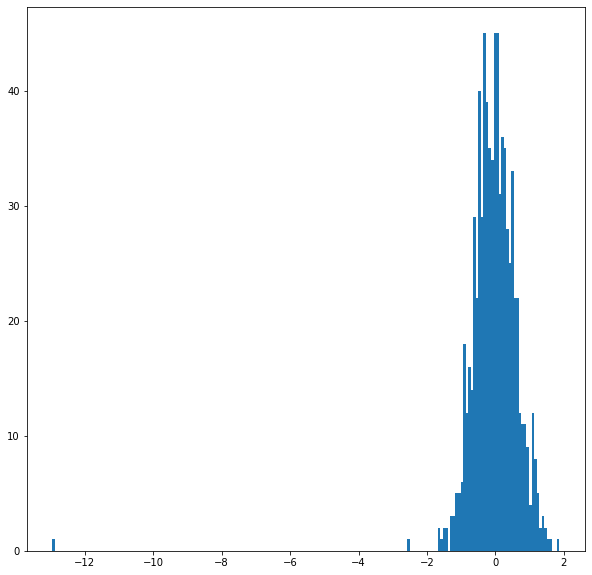

In [10]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [11]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
token_embeddings = [] 

# For each token in the sentence...
for token_i in range(len(tokenized_text)):
  
  # Holds 12 layers of hidden states for each token 
  hidden_layers = [] 
  
  # For each of the 12 layers...
  for layer_i in range(len(encoded_layers)):
    
    # Lookup the vector for `token_i` in `layer_i`
    vec = encoded_layers[layer_i][batch_i][token_i]
    
    hidden_layers.append(vec)
    
  token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

Number of tokens in sequence: 22
Number of layers per token: 12


In [12]:
concatenated_last_4_layers = [torch.cat((layer[-1], layer[-2], layer[-3], layer[-4]), 0) for layer in token_embeddings] # [number_of_tokens, 3072]

summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings] # [number_of_tokens, 768]

In [13]:
sentence_embedding = torch.mean(encoded_layers[11], 1)
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]

Our final sentence embedding vector of shape:


(None, 768)

In [14]:
print (text)

After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.


In [15]:
print ("First fifteen values of 'bank' as in 'bank robber':")
summed_last_4_layers[10][:15]

First fifteen values of 'bank' as in 'bank robber':


tensor([ 1.1868, -1.5298, -1.3770,  1.0648,  3.1446,  1.4003, -4.2407,  1.3946,
        -0.1170, -1.8777,  0.1091, -0.3862,  0.6744,  2.1924, -4.5306])

In [16]:
print ("First fifteen values of 'bank' as in 'bank vault':")
summed_last_4_layers[6][:15]

First fifteen values of 'bank' as in 'bank vault':


tensor([ 2.1319, -2.1413, -1.6260,  0.8638,  3.3173,  0.1797, -4.4853,  3.1215,
        -0.9740, -3.1780,  0.1045, -1.5481,  0.4758,  1.1703, -4.4859])

In [17]:
print ("First fifteen values of 'bank' as in 'river bank':")
summed_last_4_layers[19][:15]

First fifteen values of 'bank' as in 'river bank':


tensor([ 1.1295, -1.4725, -0.7296, -0.0901,  2.4970,  0.5330,  0.9742,  5.1834,
        -1.0692, -1.5941,  1.9261,  0.7119, -0.9809,  1.2127, -2.9812])

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Compare "bank" as in "bank robber" to "bank" as in "river bank"
different_bank = cosine_similarity(summed_last_4_layers[10].reshape(1,-1), summed_last_4_layers[19].reshape(1,-1))[0][0]

# Compare "bank" as in "bank robber" to "bank" as in "bank vault" 
same_bank = cosine_similarity(summed_last_4_layers[10].reshape(1,-1), summed_last_4_layers[6].reshape(1,-1))[0][0]

In [19]:
print ("Similarity of 'bank' as in 'bank robber' to 'bank' as in 'bank vault':",  same_bank)

Similarity of 'bank' as in 'bank robber' to 'bank' as in 'bank vault': 0.9456753


In [20]:
print ("Similarity of 'bank' as in 'bank robber' to 'bank' as in 'river bank':",  different_bank)

Similarity of 'bank' as in 'bank robber' to 'bank' as in 'river bank': 0.6797334


In [12]:
from bert_serving.client import BertClient
bc = BertClient()

In [30]:
q = 'Name the television show which has artist named Entity ?'
vec = bc.encode([q], show_tokens=True)
vec

(array([[[-0.19964133, -0.14115876, -0.34231967, ..., -0.9036322 ,
           0.15148601,  0.1675286 ],
         [ 0.39201322, -0.1717876 ,  0.86706764, ..., -2.0062697 ,
           1.2954623 , -0.5227411 ],
         [-0.6033677 , -0.16857448, -0.2074915 , ..., -1.135671  ,
           1.634594  , -0.48202583],
         ...,
         [-0.        , -0.        ,  0.        , ..., -0.        ,
           0.        , -0.        ],
         [-0.        , -0.        ,  0.        , ..., -0.        ,
           0.        , -0.        ],
         [-0.        , -0.        , -0.        , ..., -0.        ,
           0.        , -0.        ]]], dtype=float32),
 [['[CLS]',
   'name',
   'the',
   'television',
   'show',
   'which',
   'has',
   'artist',
   'named',
   'entity',
   '?',
   '[SEP]']])

In [28]:
qsplit = q.lower().split()
vec = bc.encode([qsplit], is_tokenized=True, show_tokens=True)
vec

(array([[[-0.2415832 , -0.14309117, -0.20727731, ..., -0.595832  ,
          -0.00849143, -0.02547919],
         [-0.3987112 , -0.0562871 , -0.10846417, ..., -0.40035337,
           0.66998273, -1.0524428 ],
         [ 0.43796057,  0.625638  ,  0.55722535, ..., -0.5351783 ,
          -0.1575391 ,  0.02589705],
         ...,
         [ 0.        , -0.        , -0.        , ...,  0.        ,
          -0.        , -0.        ],
         [ 0.        , -0.        , -0.        , ...,  0.        ,
          -0.        , -0.        ],
         [ 0.        , -0.        , -0.        , ...,  0.        ,
          -0.        , -0.        ]]], dtype=float32),
 [['[CLS]', 'what', '[UNK]', 'leader', 'is', 'entity', '?', '[SEP]']])